<a href="https://colab.research.google.com/github/shazzad-hasan/experiments/blob/main/binomial_distribution/binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

### PMF

In [2]:
# X ~ Bin(n=10, p=0.6)
# we want to find P(X=4)

# define variables for x, n, p
n = 10
p = 0.6
x = 4
# compute pmf
p_x = stats.binom.pmf(x, n, p)

print(f"P(X = {x}) = {p_x}")

P(X = 4) = 0.11147673600000009


### Generate random sample from a binomial

In [3]:
# x ~ Bin(n=10, p=0.4)
n = 10
p = 0.4
x = 3

# draw 100 samples from X ~ Bin(10, 0.4)
samples = stats.binom.rvs(n, p, size=100)
print(samples)

[5 3 4 4 4 5 4 3 4 1 2 5 4 4 5 4 7 1 4 5 5 5 6 4 3 3 3 5 4 5 2 6 2 5 4 2 3
 6 5 5 4 4 4 2 4 4 3 3 3 2 3 8 3 2 3 7 2 5 3 2 5 5 3 4 5 4 6 5 5 1 6 3 7 3
 6 5 6 5 3 4 5 2 4 5 4 6 5 5 4 6 4 4 4 3 3 5 4 6 3 5]


### Coin flips Simulation
We will simulate coin flips where P(H) is not nacessarily 1/2 and use np.random.rand() for sumulating random H outcomes.
We will accept the toss as H random number is less than or equal to p.

In [4]:
# probability of heads
p = 0.1
# number of trail
n_trial = 20

# generate a single toss event
def flip_outcome():
  # random number in [0, 1]
  x = np.random.rand()
  if x <= p:
    return "H"
  else:
    return "T"

# outcome is T most of the time since our choice of p value is small
random_outcomes = [flip_outcome() for i in range(n_trial)]
print(random_outcomes)

['T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'T']


In [5]:
# let's see how many times the outcome is H
n_trial = 1000
n_heads = 0
n_tails = 0

for i in range(n_trial):
  x = np.random.rand()
  if x <= p:
    n_heads += 1
  else:
    n_tails += 1

print(f"Out of {n_trial} coin flips, {n_heads} landed 'H'")

print("Prescribed p = {p}")
print(f"Estimated p = {n_heads/n_trial}")

Out of 1000 coin flips, 103 landed 'H'
Prescribed p = {p}
Estimated p = 0.103


### Sampling from a Binomial Distribution

In [6]:
def sample_binomial(n, p):
  n_heads = 0
  for i in range(n):
    x = np.random.rand()
    if x <= p:
      n_heads += 1
  return n_heads

(array([345.,   0.,   0.,   0., 384.,   0.,   0.,   0., 189.,   0.,   0.,
          0.,  69.,   0.,   0.,   0.,  12.,   0.,   0.,   1.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

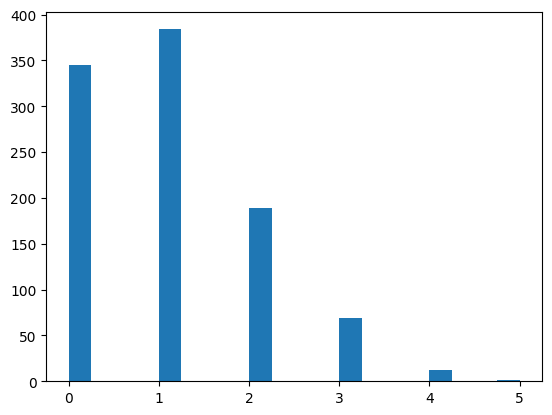

In [7]:
n_trial = 1000

# number of tosses in each experiment
n = 10
p = 0.1

n_heads_arr = np.zeros(n_trial)
for i in range(n_trial):
  n_heads = sample_binomial(n, p)
  n_heads_arr[i] = n_heads

plt.hist(n_heads_arr, bins=20)

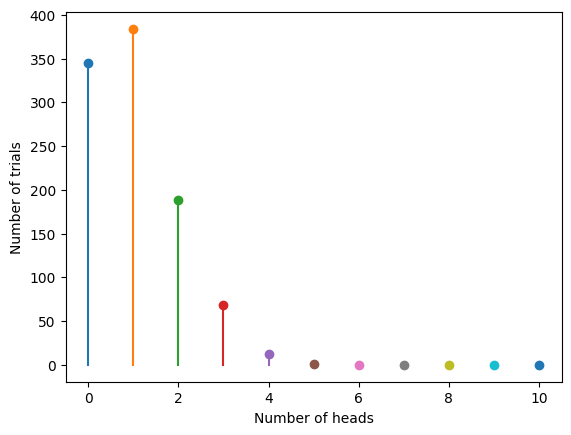

In [8]:
for i in range(n+1):
  # number of trials with 'i' heads
  n_i = np.sum(n_heads_arr == i)
  plt.scatter(i, n_i)
  # add vertical lines
  plt.plot([i,i], [0,n_i])
plt.xlabel("Number of heads")
plt.ylabel(f"Number of trials")
plt.show()

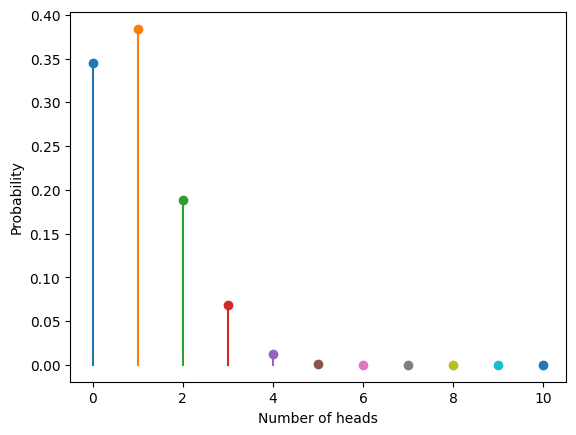

In [9]:
for i in range(n+1):
  # number of trials with 'i' heads
  n_i = np.sum(n_heads_arr == i)
  plt.scatter(i, n_i/n_trial)
  # add vertical lines
  plt.plot([i,i], [0,n_i/n_trial])
plt.xlabel("Number of heads")
plt.ylabel("Probability")
plt.show()